In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
scale = 1.5
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('axes', titlesize=12*scale)
plt.rc('xtick', labelsize=8*scale)
plt.rc('ytick', labelsize=8*scale)
plt.rc('axes', labelsize=10*scale)
plot_width = 3.487 * scale
plot_height = plot_width / 1.618

In [3]:
clean = np.array([np.sin(x) for x in np.arange(0,15,0.2)])
dirty = np.random.normal(0, 0.3, size=len(clean)) + clean
print(len(clean))

75


In [4]:
from statsmodels.tsa.ar_model import AR
t_size = 30
model = AR(clean[:-t_size])
model_fitted = model.fit()
clean_predictions = model_fitted.predict(
    start=len(clean)-t_size, 
    end=len(clean)-1, 
    dynamic=False)
model = AR(dirty[:-t_size])
model_fitted = model.fit()
dirty_predictions = model_fitted.predict(
    start=len(dirty)-t_size, 
    end=len(dirty)-1, 
    dynamic=False)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


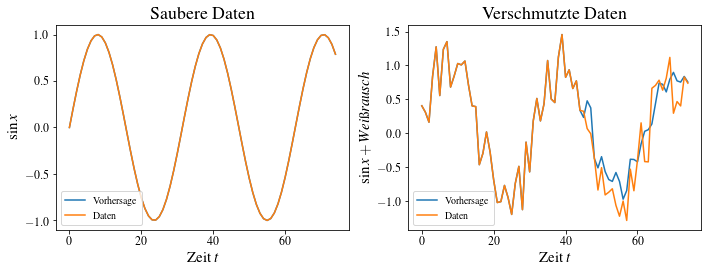

In [5]:
fig, ax = plt.subplots(1,2,figsize=(1.9*plot_width,1.2*plot_height))
ax[0].plot(np.concatenate([clean[:-t_size],clean_predictions]),label="Vorhersage")
ax[0].plot(clean,label="Daten")
ax[0].set_title('Saubere Daten')
ax[0].set_xlabel('Zeit $t$')
ax[0].set_ylabel('$\sin{x}$')
ax[1].plot(np.concatenate([dirty[:-t_size],dirty_predictions]),label="Vorhersage")
ax[1].plot(dirty,label="Daten")
ax[1].set_title('Verschmutzte Daten')
ax[1].set_xlabel('Zeit $t$')
ax[1].set_ylabel('$\sin{x} + Weißrausch$')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.savefig("ar_sauber_verschmutze_daten.pdf")

In [6]:
dif = clean-dirty
model = AR(dif[:-t_size])
model_fitted = model.fit()
dif_predictions = model_fitted.predict(
    start=len(dif)-t_size, 
    end=len(dif)-1, 
    dynamic=False)

In [7]:
dirty_predictions[-t_size:] = dirty[-t_size:] + dif_predictions

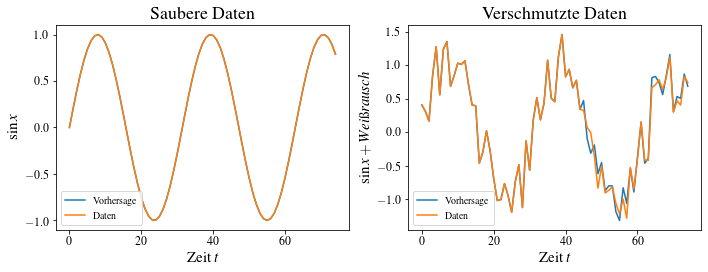

In [8]:
fig, ax = plt.subplots(1,2,figsize=(1.9*plot_width,1.2*plot_height))
ax[0].plot(np.concatenate([clean[:-t_size],clean_predictions]),label="Vorhersage")
ax[0].plot(clean,label="Daten")
ax[0].set_title('Saubere Daten')
ax[0].set_xlabel('Zeit $t$')
ax[0].set_ylabel('$\sin{x}$')
ax[1].plot(np.concatenate([dirty[:-t_size],dirty_predictions]),label="Vorhersage")
ax[1].plot(dirty,label="Daten")
ax[1].set_title('Verschmutzte Daten')
ax[1].set_xlabel('Zeit $t$')
ax[1].set_ylabel('$\sin{x} + Weißrausch$')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.savefig("arx_sauber_verschmutze_daten.pdf")

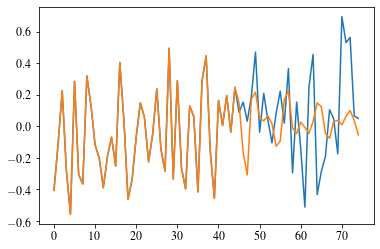

In [9]:
plt.plot(dif)
plt.plot(np.concatenate([dif[:-t_size],dif_predictions]))

In [10]:
dif_predictions

array([ 0.14693012, -0.16631734, -0.30799707,  0.1731763 ,  0.21578974,
        0.05049623,  0.03486499,  0.06638048,  0.01622344, -0.12678827,
       -0.09499834,  0.16899387,  0.22268428, -0.01101028, -0.04569021,
        0.0259474 , -0.00735903, -0.04589686,  0.03080229,  0.14767998,
        0.12439928, -0.04416562, -0.07641054,  0.02924671,  0.03774238,
        0.00895413,  0.06251643,  0.09981062,  0.03622924, -0.05439096])

In [11]:
dif[:-t_size]

array([-0.40556085, -0.11232921,  0.22553291, -0.27360775, -0.55697746,
        0.28505305, -0.30572982, -0.36522855,  0.31836148,  0.13070523,
       -0.11887374, -0.2000046 , -0.38921542, -0.19176384, -0.06914312,
       -0.25176045,  0.40447656,  0.03999376, -0.46239362, -0.33643862,
       -0.06616109,  0.14882589,  0.05535327, -0.22536142, -0.04862982,
        0.23672861, -0.14374778, -0.28524066,  0.49408521, -0.33412344,
        0.28890305, -0.26411429, -0.39666629,  0.1289883 ,  0.06017854,
       -0.41539485,  0.28847689,  0.44555165, -0.15640893, -0.45671817,
        0.16393858,  0.00513164,  0.19442237, -0.03803153,  0.24647234])

In [12]:
plt.plot(dirty.rolli)

AttributeError: 'numpy.ndarray' object has no attribute 'rolli'

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(plot_width,plot_height))
rolling3 = pd.DataFrame(dirty).rolling(window=3,center=True).mean()
rolling10 = pd.DataFrame(dirty).rolling(window=10,center=True).mean()
rolling20 = pd.DataFrame(dirty).rolling(window=20,center=True).mean()
ax.plot(dirty,label="Daten")
ax.plot(rolling3,label="Fenster 3")
ax.plot(rolling10,label="Fenster 10")
ax.plot(rolling20,label="Fenster 20")
ax.set_title('Gleitender Mittelwert')
ax.set_xlabel('Zeit $t$')
ax.set_ylabel('$\sin{x} + Weißrausch$')
plt.legend()
plt.tight_layout()
plt.savefig("Gleitender_Mittelwert.pdf")

In [ ]:
results = {}
betas = [0.5,0.8,0.9,0.98]
for beta in betas:
    results[beta] = [0]
    for i in range(len(dirty)):
        try:
            results[beta].append((1-beta)*dirty[i+1]+beta*results[beta][i])
        except:
            continue

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(plot_width,plot_height))
ax.plot(dirty,label="Daten")
for key, value in results.items():
    ax.plot(value,label=r"$\beta="+str(key)+"$")
ax.set_title('EWMA')
ax.set_xlabel('Zeit $t$')
ax.set_ylabel('$\sin{x} + Weißrausch$')
plt.legend()
plt.tight_layout()
plt.savefig("EWMA.pdf")

In [ ]:
dirty

In [ ]:
data = {}
data["x"] = [6, 10, 9.6, 8.3, 7.7, 5.4, 5.6, 5.9, 6.3, 6.8, 7.5, 8.5]
data[r"$x^{truth}$"] = [6, 5.6, 5.4, np.nan,np.nan , 5.4,np.nan ,np.nan ,np.nan ,np.nan ,np.nan , 8.5]
data[r"$x^{truth^{*}}$"] = [6, 5.6, 5.4, 5.2, 5.3, 5.4, 5.6, 5.9, 6.3, 6.8, 7.5, 8.5]
data[r"$y$"] = [6, 5.6, 5.4, 5.2, 5.4, 5.4, 5.6, 5.9, 6.3, 6.8, 7.5, 8.5]

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(plot_width,plot_height))
line_s = ["o-","o","-","x-"]
for i, x in enumerate(data.items()):
    key, value = x
    ax.plot(value,line_s[i],label=key)
ax.set_xlabel('Zeit $t$')
ax.set_ylabel('$Daten$')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("beispiel1_data.pdf")

In [ ]:
for i ,x in enumerate(data.items()):
    k,v = x
    print(i,k)

In [ ]:
data = {}
data["x"] = [6, 10, 9.6, 8.3, 7.7, 5.4, 5.6, 5.9, 6.3, 6.8, 7.5, 8.5]
data[r"$x^{truth}$"] = [6, 5.6, 5.4, np.nan,np.nan , 5.4,np.nan ,np.nan ,np.nan ,np.nan ,np.nan , 8.5]
data[r"$x^{truth^{*}}$"] = [6, 5.6, 5.4, 5.2, 5.3, 5.4, 5.6, 5.9, 6.3, 6.8, 7.5, 8.5]
data[r"$\hat{y}$"] = [np.nan, np.nan, np.nan, 6.2, 7.7, np.nan, 5.6, 5.9, 6.3, 6.8, 7.5, np.nan]
fig, ax = plt.subplots(1,1,figsize=(plot_width,plot_height))
line_s = ["o-","+","-","x"]
for i, x in enumerate(data.items()):
    key, value = x
    ax.plot(value,line_s[i],label=key)
ax.set_xlabel('Zeit $t$')
ax.set_ylabel('$Daten$')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("beispiel2_data.pdf")

In [ ]:
a = [1] * 100
a[10] = 2
n = np.random.normal(-0.05, 0.05, size=len(a))
plt.plot(np.array(a)+n)
plt.ylim([0,2.5])
plt.savefig("../Präsentation/plots/anom.pdf")

In [ ]:
np.random.random(100)

In [ ]:
AR()